In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt


In [9]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/1r2u8jsk'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

X_axis = 'n_hiddens'
X_axis_name = 'Number of Hidden Units'

In [10]:
runs

<Runs maximes_crew/S3_SHD_runs>

In [11]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    # dt_min = config.get('dt_min')
    # dt_max = config.get('dt_max')
    best_valid_acc = summary.get('best valid acc')

    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            'lr': lr,
            # 'dt_min': dt_min,
            # 'dt_max': dt_max,
            'best_valid_acc': best_valid_acc
        })



In [12]:
data

[{'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'best_valid_acc': 0.9187973484848484},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'best_valid_acc': 0.9256628787878788},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'best_valid_acc': 0.9378551136363638},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'best_valid_acc': 0.9389204545454546},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'best_valid_acc': 0.9399857954545454},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'best_valid_acc': 0.9447601010101008},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'best_valid_acc': 0.9328440656565656},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'best_valid_acc': 0.9360795454545454},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'best_valid_acc': 0.9412878787878788},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'best_valid_acc': 0.9495344065656564},
 {'n_layers': 3,
  'n_hiddens': 1024,
  'lr': 0.005,
  'best

In [13]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby([X_axis, 'lr']).agg({'best_valid_acc': 'mean'}).reset_index()

# Now, group by n_layers and take the maximum of these averages
df_final = df_grouped.groupby(X_axis).agg({'best_valid_acc': 'max'}).reset_index()

In [14]:
df_grouped

,n_hiddens,lr,best_valid_acc
0,64,0.005,0.897775
1,64,0.010,0.902549
2,64,0.050,0.909107
3,128,0.005,0.907071
4,128,0.010,0.916746
5,128,0.050,0.917898
6,256,0.005,0.929956
7,256,0.010,0.931140
8,256,0.050,0.908191
9,512,0.005,0.933444


In [15]:
df_final

,n_hiddens,best_valid_acc
0,64,0.909107
1,128,0.917898
2,256,0.931140
3,512,0.937303
4,1024,0.937098
5,2048,0.940901
6,4096,0.932244


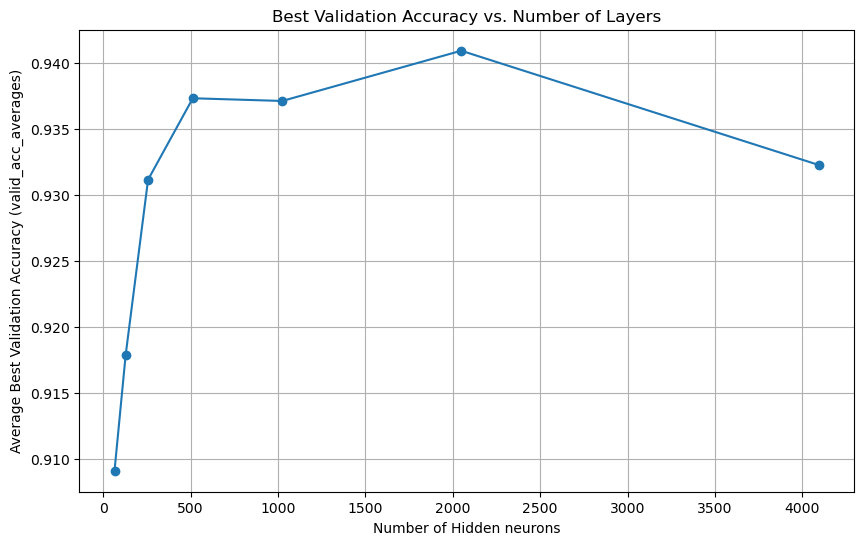

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df_final[X_axis], df_final['best_valid_acc'], marker='o')


plt.xlabel(X_axis_name)
plt.ylabel('Average Best Validation Accuracy (valid_acc_averages)')
plt.title('Best Validation Accuracy vs. Number of Layers')
plt.grid(True)
plt.show()